In [7]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
import astropy.units as u

In [40]:
time_conv = (1 * u.kpc/(u.km/u.s))
time_conv = time_conv.to_value(u.Gyr)
print(time_conv)

0.9777922216807892


In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/outflow/'

In [27]:
sn = arepo.Snapshot(basepath + 'runs/GALAKOS_fg0.1/lvl2/output', 41, combineFiles=True)

In [28]:
sfh_file = np.genfromtxt(basepath+'runs/GALAKOS_fg0.1/lvl3/output/sfr.txt')

time, sfr = sfh_file[:,0], sfh_file[:,2]

key = np.logical_and(time > 0.5-0.15, time < 0.5+0.15)
ave_sfr = np.mean(sfr[key])
# ave_sfr = 1.75
ave_sfr_cu = ave_sfr / 1E10 * 1E9 * time_conv
print('ave_sfr=', ave_sfr)

ave_sfr= 1.75


In [29]:
center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
mass = sn.part0.mass.value

z0 = 3
dr = 0.1 * z0

x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

r = np.linalg.norm(pos, axis=1)
phi = np.arctan2(y, x)
theta = np.arccos(z/r)

rhat = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
vel_r = rhat[0]*vel[:,0] + rhat[1]*vel[:,1] + rhat[2]*vel[:,2]

key = np.logical_and(np.abs(z) > z0-dr/2, np.abs(z) < z0+dr/2)
key_out = np.logical_and(key, vel_r > 0)
key_in = np.logical_and(key, vel_r < 0)

Mdot_out = np.sum(mass[key_out]*vel_r[key_out])/dr
Mdot_in = np.sum(mass[key_in]*vel_r[key_in])/dr



print(Mdot_out/ave_sfr_cu)
print(Mdot_in/ave_sfr_cu)


0.0
-0.011051351913133957


In [30]:
def mass_loading(sn, z0):
    center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
    pos = sn.part0.pos.value - center
    vel = sn.part0.vel.value
    mass = sn.part0.mass.value

    dr = 0.1 * z0

    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]

    r = np.linalg.norm(pos, axis=1)
    phi = np.arctan2(y, x)
    theta = np.arccos(z/r)

    rhat = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
    vel_r = rhat[0]*vel[:,0] + rhat[1]*vel[:,1] + rhat[2]*vel[:,2]

    key = np.logical_and(np.abs(z) > z0-dr/2, np.abs(z) < z0+dr/2)
    key_out = np.logical_and(key, vel_r > 0)
    key_in = np.logical_and(key, vel_r < 0)

    Mdot_out = np.sum(mass[key_out]*vel_r[key_out])/dr
    Mdot_in = np.sum(mass[key_in]*vel_r[key_in])/dr
    
    return Mdot_out, Mdot_in
    

In [32]:
Mdot_out, Mdot_in = mass_loading(sn, 1)
print(Mdot_out, Mdot_in)

0.0 -0.001891037039450911


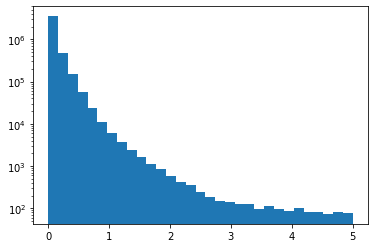

In [33]:
plt.hist(np.abs(z), bins=np.linspace(0, 5, 32))
plt.yscale('log')

### All snapshots

In [54]:
fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1-lvl4.npy'
ofl4 = np.load(fname, allow_pickle=True).item()

fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1-lvl3.npy'
ofl3 = np.load(fname, allow_pickle=True).item()

fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1-lvl2.npy'
ofl2 = np.load(fname, allow_pickle=True).item()

# Ngb = 64
fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1_Ngb64-lvl4.npy'
ofl4_Ngb = np.load(fname, allow_pickle=True).item()

fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1_Ngb64-lvl3.npy'
ofl3_Ngb = np.load(fname, allow_pickle=True).item()

# fSN = 5
fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1_fSN5-lvl4.npy'
ofl4_fSN = np.load(fname, allow_pickle=True).item()

fname = basepath + 'anlys/loading/loading_GALAKOS_fg0.1_fSN5-lvl3.npy'
ofl3_fSN = np.load(fname, allow_pickle=True).item()

<ipython-input-52-b8116734214f>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl4['Time'], ofl4['Mdot_out_1']/ofl4['SFR_CodeUnits'], label='lvl4')
<ipython-input-52-b8116734214f>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl3['Time'], ofl3['Mdot_out_1']/ofl3['SFR_CodeUnits'], label='lvl3')
<ipython-input-52-b8116734214f>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl2['Time'], ofl2['Mdot_out_1']/ofl2['SFR_CodeUnits'], label='lvl2')


(0.01, 10.0)

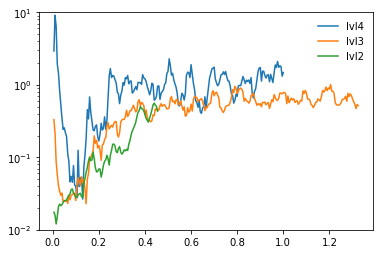

In [52]:
plt.plot(ofl4['Time'], ofl4['Mdot_out_1']/ofl4['SFR_CodeUnits'], label='lvl4')
plt.plot(ofl3['Time'], ofl3['Mdot_out_1']/ofl3['SFR_CodeUnits'], label='lvl3')
plt.plot(ofl2['Time'], ofl2['Mdot_out_1']/ofl2['SFR_CodeUnits'], label='lvl2')
plt.yscale('log')
plt.legend(frameon=False)
plt.ylim(10.**(-2), 10.**(1))

<ipython-input-57-3fd55fa55d0d>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl3['Time'], ofl3['Mdot_out_1']/ofl3['SFR_CodeUnits'], label='Ngb=512 (fid)')
<ipython-input-57-3fd55fa55d0d>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl3_Ngb['Time'], ofl3_Ngb['Mdot_out_1']/ofl3_Ngb['SFR_CodeUnits'], label='Ngb=64')


(0.01, 10.0)

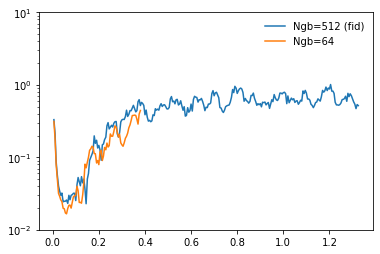

In [57]:
plt.plot(ofl3['Time'], ofl3['Mdot_out_1']/ofl3['SFR_CodeUnits'], label='Ngb=512 (fid)')
plt.plot(ofl3_Ngb['Time'], ofl3_Ngb['Mdot_out_1']/ofl3_Ngb['SFR_CodeUnits'], label='Ngb=64')
plt.yscale('log')
plt.legend(frameon=False)
plt.ylim(10.**(-2), 10.**(1))

<ipython-input-59-d6b54a21cfbc>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl3['Time'], ofl3['Mdot_out_1']/ofl3['SFR_CodeUnits'], label='fSN=1 (fid)')
<ipython-input-59-d6b54a21cfbc>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl3_fSN['Time'], ofl3_fSN['Mdot_out_1']/ofl3_fSN['SFR_CodeUnits'], label='fSN=5')


(0.01, 10.0)

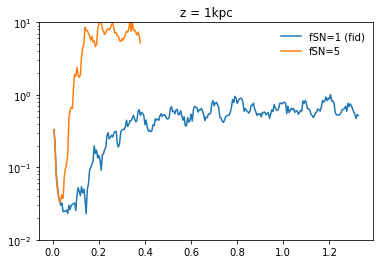

In [59]:
plt.plot(ofl3['Time'], ofl3['Mdot_out_1']/ofl3['SFR_CodeUnits'], label='fSN=1 (fid)')
plt.plot(ofl3_fSN['Time'], ofl3_fSN['Mdot_out_1']/ofl3_fSN['SFR_CodeUnits'], label='fSN=5')
plt.yscale('log')
plt.legend(frameon=False)
plt.title('z = 1kpc')
plt.ylim(10.**(-2), 10.**(1))

<ipython-input-62-d9d369116a41>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ofl3['Time'], ofl3['Mdot_out_3']/ofl3['SFR_CodeUnits'], label='fSN=1 (fid)')
<ipython-input-62-d9d369116a41>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ofl3_fSN['Time'], ofl3_fSN['Mdot_out_3']/ofl3_fSN['SFR_CodeUnits'], label='fSN=5')


(0.001, 10.0)

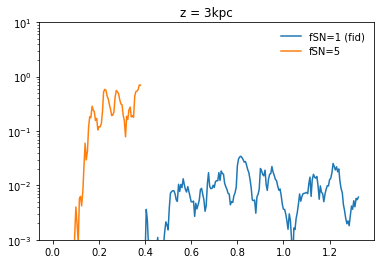

In [62]:
plt.plot(ofl3['Time'], ofl3['Mdot_out_3']/ofl3['SFR_CodeUnits'], label='fSN=1 (fid)')
plt.plot(ofl3_fSN['Time'], ofl3_fSN['Mdot_out_3']/ofl3_fSN['SFR_CodeUnits'], label='fSN=5')
plt.yscale('log')
plt.legend(frameon=False)
plt.title('z = 3kpc')
plt.ylim(10.**(-3), 10.**(1))

<ipython-input-63-b2f329910c43>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl4_fSN['Time'], ofl4_fSN['Mdot_out_1']/ofl4_fSN['SFR_CodeUnits'], label='lvl4')
<ipython-input-63-b2f329910c43>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ofl3_fSN['Time'], ofl3_fSN['Mdot_out_1']/ofl3_fSN['SFR_CodeUnits'], label='lvl3')


(0.001, 10.0)

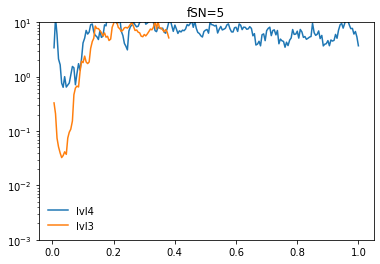

In [63]:
plt.plot(ofl4_fSN['Time'], ofl4_fSN['Mdot_out_1']/ofl4_fSN['SFR_CodeUnits'], label='lvl4')
plt.plot(ofl3_fSN['Time'], ofl3_fSN['Mdot_out_1']/ofl3_fSN['SFR_CodeUnits'], label='lvl3')
plt.yscale('log')
plt.legend(frameon=False)
plt.title('fSN=5')
plt.ylim(10.**(-3), 10.**(1))